## Data Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

from PIL import Image
import urllib
import os

- last 17 Serie A seasons
- at least 10 games between the teams

In [2]:
df_nemesis = pd.read_csv('../data/team_nemesis.csv')
df_nemesis

,Unnamed: 0,team,nemesis,pct_points,num_games
0,0,Atalanta,Juventus,16.67,28.0
1,1,Bologna,Juventus,11.54,26.0
2,2,Cagliari,Milan,9.38,32.0
3,3,Catania,Milan,12.50,16.0
4,4,Chievo,Milan,7.69,26.0
5,5,Empoli,Inter,8.33,16.0
6,6,Fiorentina,Roma,25.49,34.0
7,7,Genoa,Roma,21.11,30.0
8,8,Inter,Juventus,28.12,32.0
9,9,Juventus,Napoli,52.22,30.0


In [4]:
df_nemesis = df_nemesis[['team', 'nemesis', 'pct_points', 'num_games']]

In [5]:
df_nemesis = df_nemesis[df_nemesis.team.isin(['Atalanta', 'Fiorentina', 'Inter', 'Juventus',
'Lazio', 'Milan', 'Napoli', 'Roma'])]
df_nemesis

,team,nemesis,pct_points,num_games
0,Atalanta,Juventus,16.67,28.0
6,Fiorentina,Roma,25.49,34.0
8,Inter,Juventus,28.12,32.0
9,Juventus,Napoli,52.22,30.0
10,Lazio,Juventus,14.58,32.0
11,Milan,Juventus,31.25,32.0
12,Napoli,Empoli,41.67,12.0
15,Roma,Juventus,26.04,32.0


In [6]:
df_nemesis['team_id'] = [8524, 8535, 8636, 9885, 8543, 8564, 9875, 8686]

In [7]:
df_nemesis['nemesis_id'] = [9885, 8686, 9885, 9875, 9885, 9885, 8534, 9885]

In [8]:
df_nemesis

,team,nemesis,pct_points,num_games,team_id,nemesis_id
0,Atalanta,Juventus,16.67,28.0,8524,9885
6,Fiorentina,Roma,25.49,34.0,8535,8686
8,Inter,Juventus,28.12,32.0,8636,9885
9,Juventus,Napoli,52.22,30.0,9885,9875
10,Lazio,Juventus,14.58,32.0,8543,9885
11,Milan,Juventus,31.25,32.0,8564,9885
12,Napoli,Empoli,41.67,12.0,9875,8534
15,Roma,Juventus,26.04,32.0,8686,9885


In [9]:
df_nemesis['pct_points_nem'] = 100 - df_nemesis.pct_points
df_nemesis

,team,nemesis,pct_points,num_games,team_id,nemesis_id,pct_points_nem
0,Atalanta,Juventus,16.67,28.0,8524,9885,83.33
6,Fiorentina,Roma,25.49,34.0,8535,8686,74.51
8,Inter,Juventus,28.12,32.0,8636,9885,71.88
9,Juventus,Napoli,52.22,30.0,9885,9875,47.78
10,Lazio,Juventus,14.58,32.0,8543,9885,85.42
11,Milan,Juventus,31.25,32.0,8564,9885,68.75
12,Napoli,Empoli,41.67,12.0,9875,8534,58.33
15,Roma,Juventus,26.04,32.0,8686,9885,73.96


In [10]:
df_nemesis['pct_points'] = df_nemesis['pct_points'].round(2)
df_nemesis['pct_points_nem'] = df_nemesis['pct_points_nem'].round(2)

In [11]:
df_nemesis.dtypes

team               object
nemesis            object
pct_points        float64
num_games         float64
team_id             int64
nemesis_id          int64
pct_points_nem    float64
dtype: object

The Layout of the table

Our table will have the following columns:

| home_logo (team) | team | away_logo (nemesis) | pct_points | pct_points_nemesis | num_games |

Which results in 6 columns for our table

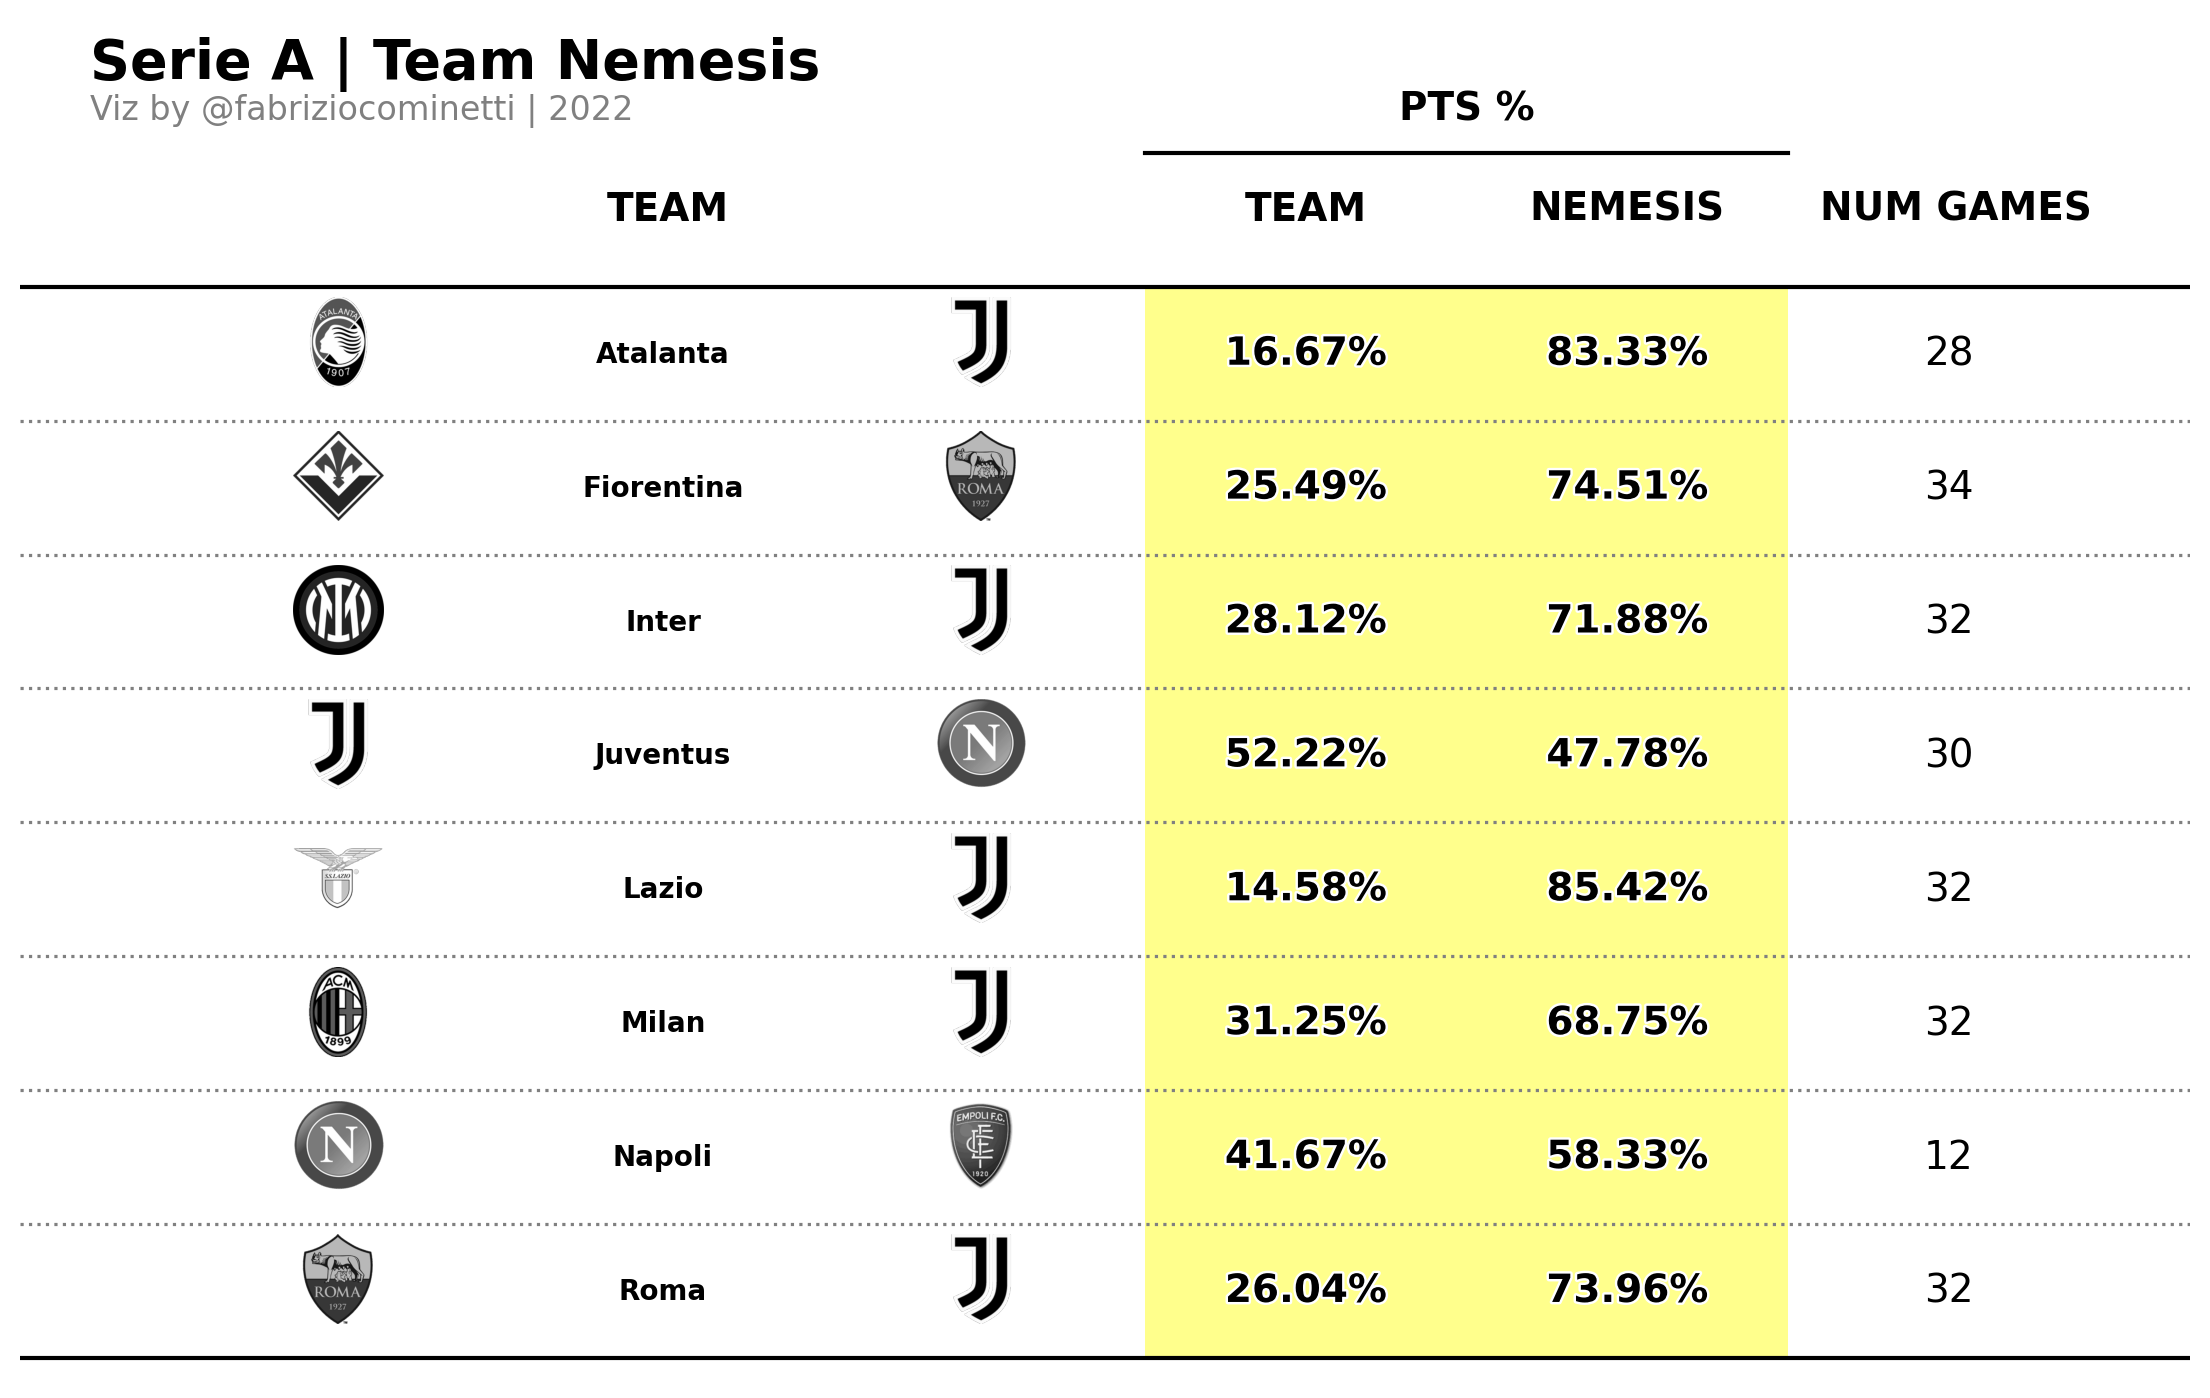

In [13]:
fig = plt.figure(figsize=(14, 9), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 6
nrows = df_nemesis.shape[0]

df_nemesis = df_nemesis.sort_values(by='team', ascending=False).reset_index(drop=True)

ax.set_xlim(0, ncols + .75)
ax.set_ylim(-.15, nrows + 2)

# --- Define URL and helper functions to add logos --------------------------------

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# -- The CMAP for the gradient
cmap = cm.get_cmap('summer')

# -- Add team logos

for y in range(nrows):
    # - Home logo
    x = 0.35
    team_id = df_nemesis['team_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # - Away logo
    x = 3.35
    team_id = df_nemesis['nemesis_id'].iloc[y]
    ax_coords = DC_to_NFC([x - .5, y + .25])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    # - Fixture result
    x = 2
    home_name = df_nemesis['team'].iloc[y]
    away_name = df_nemesis['nemesis'].iloc[y]
    num_games = df_nemesis['num_games'].iloc[y]

    label_ = f'{home_name}'
    ax.annotate(
        xy=(x,y + 0.5),
        text=label_,
        ha='center',
        va='center',
        weight='bold'
    )

# -- Points Percentage
    points_percentage = df_nemesis['pct_points'].iloc[y]
    points_percentage_nem = df_nemesis['pct_points_nem'].iloc[y]
    label_ph_ = f'{points_percentage}%'
    label_pa_ = f'{points_percentage_nem}%'
    # -- Pts Team
    x = 4
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_ph_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -- Pts Nemesis
    x = 5
    text_ = ax.annotate(
        xy=(x,y+0.5),
        text=label_pa_,
        ha='center',
        va='center',
        size=14,
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
    )
    # -----------------------------------------
    # -- Adding the colors
    # -- We subtract and add .5 beacause the width of our column is 1, 1/2 = .5
    x = 4
    ax.fill_between(
        x=[(x - .5), (x + .5)],
        y1=y,
        y2=y + 1,
        color=cmap(points_percentage),
        zorder=2,
        ec="None",
        alpha=0.75
    )
    x = 5
    ax.fill_between(
        x=[(x - .5), (x + .5)],
        y1=y,
        y2=y + 1,
        color=cmap(points_percentage_nem),
        zorder=2,
        ec="None",
        alpha=0.75
    )

# -- Games
    num_games = df_nemesis['num_games'].iloc[y]
    label_ng_ = f'{num_games:.0f}'
    # -- Number of games
    x = 6
    ax_text(
        x=x,y=y+0.5,
        s=label_ng_,
        ha='center',
        va='center',
        size=14,
        ax=ax
    )

# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw = 1.5, color = 'black', marker = '', zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw = 1.5, color = 'black', marker = '', zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw = 1.15, color = 'gray', ls = ':', zorder = 3 , marker = '')

# - Column titles
ax.annotate(
    xy = (1.825, nrows + .5),
    text = "TEAM",
    weight = "bold",
    ha = "left",
    size = 14
)
ax.annotate(
    xy = (5.6, nrows + .5),
    text = 'NUM GAMES',
    weight = "bold",
    ha = "left",
    size = 14
)
title_positions = [4 + 1*i for i in range(0,5)]
title_labels = ['TEAM' if i % 2 == 0 else 'NEMESIS' for i in range(0,5)]
for index in range(0,2):
    ax.annotate(
        xy = (title_positions[index], nrows + .5),
        text = title_labels[index],
        weight = "bold",
        ha = "center",
        size = 14
    )
    # --- Lines to make the plot pretty
    if index % 2 != 0:
        continue
    ax.plot(
        [title_positions[index] - .5, title_positions[index + 1] + .5],
        [nrows + 1, nrows + 1],
        lw = 1.5,
        color = 'black'
    )

ax.annotate(
    xy = ((4 + 5)/2, nrows + 1.25),
    text = 'PTS %',
    weight = "bold",
    ha = "center",
    size = 14
)

ax.set_axis_off()

fig_text(
    x = 0.15, y = 0.84, 
    s = "Serie A | Team Nemesis",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", weight = "bold"
)

fig_text(
    x = 0.15, y = 0.82, 
    s = "Viz by @fabriziocominetti | 2022",
    va = "bottom", ha = "left",
    fontsize = 12, color = "gray"
)

plt.savefig(
	"../figures/team-nemesis-serieA.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/team-nemesis-serieA_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)